# Microsoft Studios Project

## Business Problem

Microsft wants to create a new movie studio and I am exploring the films that are currently doing the best at the box office. I am planning to translate all the findings into actionable insights that the head of Microsoft new movie studio can help decide what type of films to create

## Data Understanding
The first thing I am doing is understanding the data that I have. This means that I'll be reading the details in the data, understanding their classifications and records provided and also get aview of what I need to do with the data. The first thing I need to do is see the ccontents of different tables and data

### Data Screening
I will start by investigating the data in different steps in an approach to find a way to interprete the data

In [1]:
# Importing the relevant packages that will be used in the screeening
import pandas as pd
import numpy as np
import sqlite3

Next we start by creating tables to gain an understanding of the contents of the data. This works hand in hand with the assistance of the imported packages that we have imported

In [2]:
#Reading a CSV file in apandas data frame
df_gross = pd.read_csv('bom.movie_gross.csv')

#Taking a look at the first 3 rows of data
df_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [3]:
#Reading a CSV file in apandas data frame
df_budgets = pd.read_csv('tn.movie_budgets.csv')

#Taking a look at the first 3 rows of data
df_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [4]:
#Reading a CSV file in apandas data frame
df_tmdb = pd.read_csv('tmdb.movies.csv')

#Taking a look at the first 3 rows of data
df_tmdb.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [5]:
#Reading a TSV file in apandas data frame
#I encountered an error and realised that I have to seperate the tabs and remove the badlines in the file
df_rt = pd.read_csv('rt.movie_info.tsv', sep='\t', error_bad_lines=False)


#Taking a look at the first 3 rows of data
df_rt.head(3)

C:\Users\USER\AppData\Local\Temp\ipykernel_14436\4052493010.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_rt = pd.read_csv('rt.movie_info.tsv', sep='\t', error_bad_lines=False)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


Next we are reading from one CSV file but from the different tables provided for us within the file

In [6]:
#To read a CSV file we first need a connection and to create a connection we'll use the code below
conn = sqlite3.connect('im.db')

In [7]:
#To avoid constant retyping we'll assign the variable q to the SQL
q = ("""
SELECT *
FROM movie_basics
""")

# Next we create a pandas data frame to read the file as the ones above
df_imdb_basics = pd.read_sql(q, conn)

#Taking a look at the first 3 rows of data
df_imdb_basics.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [8]:
#To avoid constant retyping we'll assign the variable q to the SQL
q = ("""
SELECT *
FROM movie_ratings
""")

# Next we create a pandas data frame to read the file as the ones above
df_imdb_ratings = pd.read_sql(q, conn)

#Taking a look at the first 3 rows of data
df_imdb_ratings.head(3)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [9]:
#To avoid constant retyping we'll assign the variable q to the SQL
q = ("""
SELECT *
FROM persons
""")

# Next we create a pandas data frame to read the file as the ones above
df_imdb_person = pd.read_sql(q, conn)

#Taking a look at the first 3 rows of data
df_imdb_person.head(3)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"


In [10]:
#To avoid constant retyping we'll assign the variable q to the SQL
q = ("""
SELECT *
FROM known_for
""")

# Next we create a pandas data frame to read the file as the ones above
df_imdb_fame = pd.read_sql(q, conn)

#Taking a look at the first 3 rows of data
df_imdb_fame.head(3)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471


In [11]:
#To avoid constant retyping we'll assign the variable q to the SQL
q = ("""
SELECT *
FROM movie_akas
""")

# Next we create a pandas data frame to read the file as the ones above
df_imdb_aka = pd.read_sql(q, conn)

#Taking a look at the first 3 rows of data
df_imdb_aka.head(3)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0


In [12]:
#To avoid constant retyping we'll assign the variable q to the SQL
q = ("""
SELECT *
FROM directors
""")

# Next we create a pandas data frame to read the file as the ones above
df_imdb_director = pd.read_sql(q, conn)

#Taking a look at the first 3 rows of data
df_imdb_director.head(3)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540


In [13]:
#To avoid constant retyping we'll assign the variable q to the SQL
q = ("""
SELECT *
FROM writers
""")

# Next we create a pandas data frame to read the file as the ones above
df_imdb_writer = pd.read_sql(q, conn)

#Taking a look at the first 3 rows of data
df_imdb_writer.head(3)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864


Great! From my data I can see that I have a few afactors to work with. The columns I can work with are the Budgets, Genres, Ratings, Writers and Directors. This data can be able to gain an insight and corespond well hand in hand with the movie analysis

## Data Cleaning
Yes, I have the data but I also need to acquire the right information to avoid errors that might result from poor arrangement of data or from outliers. Clean data is critical if I am going to effectively utilise the right data. I will go through the frames cleaning one by one.

### Financial Data

##### 1. Df_gross

In [14]:
#First I'll look at the shape to understand the formation of rows and columns
df_gross.shape

(3387, 5)

Looking at the shape helps us determine missing values and be able to work with figures safe from missing values

In [15]:
# I will look at the contents of the data to see the data type and the null counts
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


I can tell that there are missing values in the data and the foreign_gross is an object rather than a float

In [16]:
#I want to check the number of missing values to guage on how I will clean the data
df_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The studio, domestic gross and foreign gross have missing values and therefore I can assess what to do with the data. The first thing I am going to do is remove the rows of the studio and the domestic gross with missing values to be able to remain with values without nulls. Looking at the foreign gross the value is high and will greatly affect the table so I will remove the column.

In [17]:
# Dropping null rows in the studio column
df_gross.dropna(subset=['studio'], inplace=True)

#Confirming that the null rows are dropped
df_gross['studio'].isnull().sum()

0

Great there are no more null values

In [18]:
# Dropping null rows in the domestic gross column
df_gross.dropna(subset=['domestic_gross'], inplace=True)

#Confirming that the null rows are dropped
df_gross['domestic_gross'].isnull().sum()

0

The reason why I didn't work with the mean is because I believe that we can't really rank movies with producing the same gross and therefore I found that it would be more authentic to just deal with the actual gross.

In [19]:
# Dropping the foreign column
df_gross.drop(columns=['foreign_gross'], inplace=True)

Finally, I'll confirm if the data is up to standard

In [20]:
# confiming the cleanup
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.1+ KB


Finally, I want to confirm if there are outliers in the data to prevent extreme values affecting the statistics

Considering I am working with `graphs` on this one I will need to import packages that are used in plotting and reading of graphs

In [21]:
#importing packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

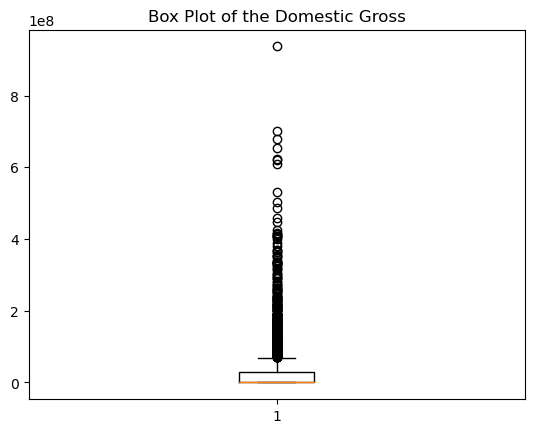

In [22]:
# The outliers I am checking for is from the domestic gross

#I am plotting a graph
plt.boxplot(df_gross['domestic_gross'])

#setting the title of the plot
plt.title('Box Plot of the Domestic Gross')

#Accessing the visualization 
plt.show()

From the graph I can see that there are outliers in the data and the wise step would be to get rid of them

In [23]:
# To calculate outliers I firts need to get the Inter Quartile Range (IQR)
Q1 = df_gross['domestic_gross'].quantile(0.25)
Q3 = df_gross['domestic_gross'].quantile(0.75)
IQR = Q3 - Q1
#I will define the lower and the upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use the conditions to remove the outliers
df_gross[(df_gross['domestic_gross'] >= lower_bound) & (df_gross['domestic_gross'] <= upper_bound)]

,title,studio,domestic_gross,year
21,Resident Evil: Afterlife,SGem,60100000.0,2010
25,The Tourist,Sony,67600000.0,2010
30,Gulliver's Travels,Fox,42800000.0,2010
34,The Sorcerer's Apprentice,BV,63200000.0,2010
44,Step Up 3-D,BV,42400000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


Great our data is clean I shall repeat similar steps for the next processes

##### 2. Df_budgets

In [24]:
#check  the shape
df_budgets.shape

(5782, 6)

In [25]:
#Get contents of the data
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There are no null values but the issue is the domestic and worldwide gross together with the production busgets are objects instead of floats

In [26]:
#Let's look at the first rows of the data
df_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


The problem is objects are strings and therefore cannot be effective in mathematical operations. The ither issue is the dollar signs are also a limit and the commas too. I am going to define a function to clean the data instead of individually trying to clean it.

In [27]:
#Defining a cleaning function
def clean_data(df, columns):
    #creating a loop to iterate cleaning through the columns
    for co in columns:
        df[co] = df[co].str.replace(',', '')
    return df

#creating a list that will be altered
clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

#calling the function
df_budget = clean_data(df_budgets, clean)

#confirming the cleanup
df_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,$425000000,$760507625,$2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,$410600000,$241063875,$1045663875
2,3,"Jun 7, 2019",Dark Phoenix,$350000000,$42762350,$149762350


In [28]:
#Defining a cleaning function
def clean_data(df, columns):
    #creating a loop to iterate cleaning through the columns
    for co in columns:
        df[co] = df[co].str.replace('$', '')
    return df

#creating a list that will be altered
clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

#calling the function
df_budget = clean_data(df_budgets, clean)

#confirming the cleanup
df_budgets.head(3)

C:\Users\USER\AppData\Local\Temp\ipykernel_14436\2648664192.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[co] = df[co].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350


In [29]:
#Defining a cleaning function
def clean_data(df, columns):
    #creating a loop to iterate cleaning through the columns
    for co in columns:
        df[co] = df[co].astype(float)
    return df

#creating a list that will be altered
clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

#calling the function
df_budget = clean_data(df_budgets, clean)

#confirming the cleanup
df_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


The function allowed me to clean the columns and so finally let me confirm the changes

In [30]:
#Confirming the cleanup
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Great, let me confirm if there are outliers in the data

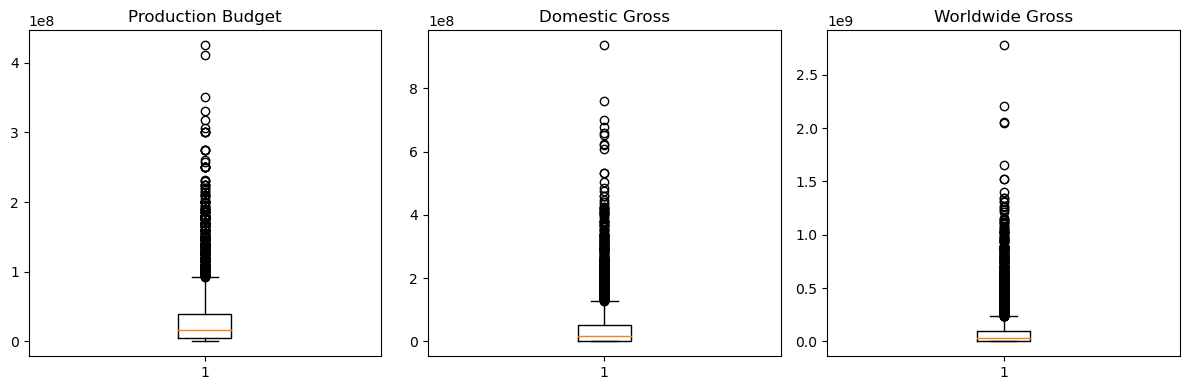

In [31]:
# I want to check them as a whole so therefore create 3 graphs

#Creating subplots for box plots
plt.figure(figsize=(12,4 ))

#Production Budget
plt.subplot(1, 3, 1)
plt.boxplot(df_budgets['production_budget'])
plt.title('Production Budget')

#Domestic Gross
plt.subplot(1, 3, 2)
plt.boxplot(df_budgets['domestic_gross'])
plt.title('Domestic Gross')

#Worldwide Gross
plt.subplot(1, 3, 3)
plt.boxplot(df_budgets['worldwide_gross'])
plt.title('Worldwide Gross')

#Visualizing the plots
plt.tight_layout()
plt.show()

From the graphs I have outliers. To make it easier I will remove the outliers by defining a function to deal with all of them

In [32]:
#Defining a function
def remove_outliers(df, column):
    #Finding the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    #Defining the lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #Creating a condition to remove the outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

#Creating a list to apply the function
finance_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']

#Creating a loop that iterates through the columns
for column in finance_columns:
    df_budgets = remove_outliers(df_budgets, column)
            

In [33]:
#I'll confirm if the outliers are removed
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4657 entries, 434 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4657 non-null   int64  
 1   release_date       4657 non-null   object 
 2   movie              4657 non-null   object 
 3   production_budget  4657 non-null   float64
 4   domestic_gross     4657 non-null   float64
 5   worldwide_gross    4657 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 254.7+ KB


I can conclude that the data is clean

### Movie info

##### 1. Df_tmdb

In [34]:
#first I'll take a look at the shape
df_tmdb.shape

(26517, 10)

In [35]:
# I'll check the columns
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Most of the data looks clean so the next step is to check for outliers

In [36]:
# Creating a list that will be used to check for outliers
info_columns = ['popularity', 'vote_average', 'vote_count']

In [37]:
#defing a function for the outliers
def remove_outliers_info(df, columns):
    #creating a list to iterate through the columns
    for col in columns:
        #finding the IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        #defining the upper and lower bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #creating a condition
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

#Removing the outliers
df_tmdb = remove_outliers_info(df_tmdb, info_columns)

In [38]:
#Reviewing the columns
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20071 entries, 229 to 26498
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         20071 non-null  int64  
 1   genre_ids          20071 non-null  object 
 2   id                 20071 non-null  int64  
 3   original_language  20071 non-null  object 
 4   original_title     20071 non-null  object 
 5   popularity         20071 non-null  float64
 6   release_date       20071 non-null  object 
 7   title              20071 non-null  object 
 8   vote_average       20071 non-null  float64
 9   vote_count         20071 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.7+ MB


The outliers are removed and now the data is clean

I think there is one data that we don't need and I will remove the columns

In [39]:
#creating a list to remove the columns
columns_tmdb = ['Unnamed: 0', 'genre_ids', 'original_language', 'release_date', 'original_title']
#removing the columns
df_tmdb.drop(columns=columns_tmdb, inplace=True)
#confirming the columns are removed
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20071 entries, 229 to 26498
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20071 non-null  int64  
 1   popularity    20071 non-null  float64
 2   title         20071 non-null  object 
 3   vote_average  20071 non-null  float64
 4   vote_count    20071 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 940.8+ KB


I think now the data is okay to work with

##### 2. Df_rt

In [40]:
#Checking the columns
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


From the assesment we can see that there are null values. The rating is an object instead of an interger and the currency is also an object instead of a float.

In [41]:
#I'll start by checking the total of null values
df_rt.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

My decision is I'll get rid of the rating, genre, director, writer and runtime with the null values. The currency and the studio have very high null values and it would be better to get rid of the column.

In [42]:
# create a list that will remove the nulls
columns_to_clean = ['rating', 'genre', 'runtime', 'director', 'writer']

In [43]:
# define a function 
def remove_null(df, column):
    #drop rows with null values
    df.dropna(subset=[column], inplace=True)
    
    #confirm that the null values are removed
    null_count = df[column].isnull().sum()
    #create a condition to check the null count
    if null_count == 0:
        print(f"{column} : {null_count}")
    return df
#iterate through the colmns
for column in columns_to_clean:
    df_rt = remove_null(df_rt, column)

rating : 0
genre : 0
runtime : 0
director : 0
writer : 0


Done, next I will remove the columns that we don't need

In [44]:
#create a list of columns to remove
columns_to_remove = ['currency', 'studio', 'box_office', 'dvd_date', 'theater_date', 'synopsis','id', 'runtime']

In [45]:
#define a function to remove the columns
def remove_columns(df, columns):
    #drop the columns from the data
    df.drop(columns=columns, inplace=True)
    return df
#remove the columns
df_rt = remove_columns(df_rt, columns_to_remove)

In [46]:
#I'll confirm that the columns have been removed
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1558
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rating    1032 non-null   object
 1   genre     1032 non-null   object
 2   director  1032 non-null   object
 3   writer    1032 non-null   object
dtypes: object(4)
memory usage: 40.3+ KB


Great the data is clean and now we can finalize on the SQL tables

### SQL 

##### 1. Df_imdb_basics

In [47]:
#I'll check the shape of the data
df_imdb_basics.shape

(146144, 6)

In [48]:
#I'll check the contents
df_imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [49]:
#I'll check for the null values
df_imdb_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

I realised that I really don't have to define a function to remove the null values. I can just simply do it this way;

In [50]:
#I create a list
columns = ['genres', 'runtime_minutes', 'original_title']
#I remove the rows with the null values
df_imdb_basics.dropna(subset=columns, inplace=True)

In [51]:
#I'll confirm that the data is cleaned
df_imdb_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [52]:
#removing unncessary columns
df_imdb_basics.drop(columns=['runtime_minutes', 'start_year', 'original_title'], inplace=True)

In [53]:
#confirming that the columns are removed
df_imdb_basics.head(3)

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama


Considering that there are no figures I'll assume that there is no need to check for outliers

##### 2. Df_imdb_ratings

In [54]:
#let's look at the shape of the data
df_imdb_ratings.shape

(73856, 3)

In [55]:
#let's look at the columns
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


I don't see the need to look for the outliers on average data

##### 3.Df_imdb_person

In [56]:
#let's look at the shape
df_imdb_person.shape

(606648, 5)

In [57]:
#now for the data
df_imdb_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


My decision is that considering the profession has null values we can work to remove the rows with nulls. I don't think we need the death and birth years, so I'll get rid of the columns

In [58]:
#remove the profession rows with null values
df_imdb_person.dropna(subset=['primary_profession'], inplace=True)

#confirm that the nulls have been removed
df_imdb_person['primary_profession'].isnull().sum()

0

In [59]:
#Remove the row column from the death and birth
df_imdb_person.drop(columns=['birth_year', 'death_year'], inplace=True)

In [60]:
#Confirm that the data is cleaned
df_imdb_person.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555308 entries, 0 to 606647
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   person_id           555308 non-null  object
 1   primary_name        555308 non-null  object
 2   primary_profession  555308 non-null  object
dtypes: object(3)
memory usage: 16.9+ MB


Again, there is no need for outliers

##### 4.Df_imdb_fame

In [61]:
#looking at the shape
df_imdb_fame.shape

(1638260, 2)

In [62]:
#looking at the data in columns
df_imdb_fame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


The data seems okay, so I'll step onto the next

##### 5.Df_imdb_aka

In [63]:
#looking at the shape
df_imdb_aka.shape

(331703, 8)

In [64]:
#looking at the contents in the column
df_imdb_aka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


Most of them are objects but I don't understand what are the reading in the contents so I'll check further

In [65]:
#looking at the first rows of data
df_imdb_aka.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


I am not sure that I have any use with the data and so I canleave it at that

##### 6. Df_imdb_director

In [66]:
#looking at the shape
df_imdb_director.shape

(291174, 2)

In [67]:
#looking at the contents
df_imdb_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


The data seems okay, so I'll just leave it for now

##### 7.Df_imdb_writer


In [68]:
#looking at the shape
df_imdb_writer.shape

(255873, 2)

In [69]:
#looking at the contents
df_imdb_writer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


This also seems okay we can leave it

## Data Analysis

In this stage I am going to use the data cleaned to look at the relations between the tables and see whether I can merge them or use them for nay calculations

### Financial Data

I will start by merging the gross and budget table

In [70]:
#merging gross to budgets
df_finance = df_gross.merge(df_budgets, left_on='title', right_on='movie', how='inner')

#confirming the merge
df_finance.head(3)

,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,The Karate Kid,Sony,176600000.0,2010,63,"Jun 22, 1984",The Karate Kid,8000000.0,90815558.0,90815558.0
1,The Bounty Hunter,Sony,67099999.0,2010,73,"Mar 19, 2010",The Bounty Hunter,45000000.0,67061228.0,135808837.0
2,Saw 3D,LGF,45700000.0,2010,79,"Oct 29, 2010",Saw 3D,17000000.0,45710178.0,133735284.0


Considering that the domestic grosses are different it could be a matter of different currencies and therefore I will drop one column

In [71]:
#dropping the domestic_gross_x
df_finance.drop(columns='domestic_gross_x', inplace=True)
#renaming the domestic_y
df_finance.rename(columns={'domestic_gross_y': 'domestic_gross'}, inplace=True)
#confirming the changes
df_finance.head(1)

,title,studio,year,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,The Karate Kid,Sony,2010,63,"Jun 22, 1984",The Karate Kid,8000000.0,90815558.0,90815558.0


I want to look at the profits from the production

###### Finance profits

To calculate the profits I will use the formular gross - budget

In [72]:
df_finance_profit = df_finance['worldwide_gross'] - df_finance['production_budget']
df_finance_profit.head()

0     82815558.0
1     90808837.0
2    116735284.0
3    118262388.0
4     87234389.0
dtype: float64

## Movie Data

I want to look at the movie charts

In [73]:
#looking at the first rows of data
df_tmdb.head(2)

,id,popularity,title,vote_average,vote_count
229,43956,8.142,Tom and Jerry Meet Sherlock Holmes,6.6,19
292,31196,7.280,Growth,5.2,33


From the data we can see that our title matches up with the finance data frame. We can use this to our advantage to merge the tables

In [74]:
#merging tmdb and finance
df_movie = df_finance.merge(df_tmdb, on='title', how='inner')
#confirming the merge
df_movie.head()

,title,studio,year,id_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,id_y,popularity,vote_average,vote_count
0,Edge of Darkness,WB,2010,8,"Jan 29, 2010",Edge of Darkness,60000000.0,43313890.0,82812456.0,468788,0.600,7.0,1
1,For Colored Girls,LGF,2010,67,"Nov 5, 2010",For Colored Girls,21000000.0,37729698.0,38017873.0,44944,2.858,6.8,33
2,Leap Year,Uni.,2010,40,"Jan 8, 2010",Leap Year,19000000.0,25918920.0,32618920.0,63555,2.563,5.6,30
3,Let Me In,Over.,2010,38,"Oct 1, 2010",Let Me In,20000000.0,12134935.0,28270399.0,430926,0.675,7.0,2
4,Another Year,SPC,2010,8,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,255898,1.004,6.3,4


I don't think we need the id's and the movie so I'll remove all

In [75]:
#dropping the ids
df_movie.drop(columns=['id_x', 'id_y', 'movie'], inplace=True)
#confirming the drop
df_movie.head(1)

,title,studio,year,release_date,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count
0,Edge of Darkness,WB,2010,"Jan 29, 2010",60000000.0,43313890.0,82812456.0,0.6,7.0,1


I have the necessary data from the movie information on finance and statistics. We also have some other data from the information that can be merged to our table from the imdb

In [76]:
#looking at the first rows of data
df_imdb_basics.head(3)

,movie_id,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama


In [77]:
#I am merging with the imdb
df_movie = df_imdb_basics.merge(df_movie, left_on='primary_title', right_on='title', how='left')
df_movie.head()

,movie_id,primary_title,genres,title,studio,year,release_date,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count
0,tt0063540,Sunghursh,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0111414,A Thin Life,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I think I'll also have to clean the data by removing the null values

In [78]:
#Checking the shape
df_movie.shape

(112282, 13)

In [79]:
#checking the data columns
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112282 entries, 0 to 112281
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           112282 non-null  object 
 1   primary_title      112282 non-null  object 
 2   genres             112282 non-null  object 
 3   title              198 non-null     object 
 4   studio             198 non-null     object 
 5   year               198 non-null     float64
 6   release_date       198 non-null     object 
 7   production_budget  198 non-null     float64
 8   domestic_gross     198 non-null     float64
 9   worldwide_gross    198 non-null     float64
 10  popularity         198 non-null     float64
 11  vote_average       198 non-null     float64
 12  vote_count         198 non-null     float64
dtypes: float64(7), object(6)
memory usage: 12.0+ MB


I can see that that removing the null values will affect the data so we con ignore

### People

We can merge the df_rt to the df_imdb_person to gather the people's information. Our tables don't have a relationship so we will just directly merge them and sort them out later.

In [80]:
#merging the two data frames
df_people = pd.merge(df_rt, df_imdb_person, left_index=True, right_index=True)

In [81]:
#confirming the merge
df_people.head(2)

,rating,genre,director,writer,person_id,primary_name,primary_profession
0,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,nm0061865,Joseph Bauer,"composer,music_department,sound_department"


Our data is merged but we have a problem. The names do not matc and we need data in which the names actually match. So I will create aprocess in which I will rrematch the data

In [82]:
#I will start by creating a seperate df for directors and writers
#Directors
directors_df = df_imdb_person[df_imdb_person['primary_profession'].str.contains('director', case=False, na=False)]
#Writers
writers_df = df_imdb_person[df_imdb_person['primary_profession'].str.contains('writer', case=False, na=False)]

In [83]:
#To avoid confusion I rename the 'primary_name' column in both datas
#Directors
directors_df.rename(columns={'primary_name': 'director_name'}, inplace=True)
#Writers
writers_df.rename(columns={'primary_name': 'writer_name'}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14436\2185598140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directors_df.rename(columns={'primary_name': 'director_name'}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14436\2185598140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  writers_df.rename(columns={'primary_name': 'writer_name'}, inplace=True)


In [84]:
#I'll merge the frames back into df_people
#Directors
df_people = pd.merge(df_people, directors_df[['person_id', 'director_name']], on='person_id', how='left')
#Writers
df_people = pd.merge(df_people, writers_df[['person_id', 'writer_name']], on='person_id', how='left')

In [85]:
#Finally I''l drop the primary profession column since I don't need it
df_people.drop(columns=['primary_profession'], inplace=True)

In [86]:
#looking at the first rows of data
df_people.head(3)

,rating,genre,director,writer,person_id,primary_name,director_name,writer_name
0,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,nm0061671,Mary Ellen Bauder,NaN,NaN
1,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,nm0061865,Joseph Bauer,NaN,NaN
2,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,nm0062070,Bruce Baum,NaN,Bruce Baum


Great! Things are starting to match up

In [87]:
#We only need one writer and director column, so we'll drop the rest
df_people.drop(columns=['director','writer'], inplace=True)

In [88]:
df_people.head(3)

,rating,genre,person_id,primary_name,director_name,writer_name
0,R,Action and Adventure|Classics|Drama,nm0061671,Mary Ellen Bauder,NaN,NaN
1,R,Drama|Science Fiction and Fantasy,nm0061865,Joseph Bauer,NaN,NaN
2,R,Drama|Musical and Performing Arts,nm0062070,Bruce Baum,NaN,Bruce Baum


In [89]:
#We remove the columns without either the director nor the writer name
df_people.dropna(subset=['director_name', 'writer_name'], how='all', inplace=True)

In [90]:
df_people.head(2)

,rating,genre,person_id,primary_name,director_name,writer_name
2,R,Drama|Musical and Performing Arts,nm0062070,Bruce Baum,NaN,Bruce Baum
5,PG,Drama|Kids and Family,nm0062879,Ruel S. Bayani,Ruel S. Bayani,NaN


Finally, we have a list of people, their genre and their rating, so next we will link them to the movies

Considering we have the person id, all we need is the movie id to access the rest of the data

In [91]:
df_imdb_fame.head(1)

,person_id,movie_id
0,nm0061671,tt0837562


We will now merge the two into one to give us access to the other tables

In [92]:
#merging the ids to the people
df_people = df_people.merge(df_imdb_fame, on='person_id', how='inner')

In [93]:
df_people.head(2)

,rating,genre,person_id,primary_name,director_name,writer_name,movie_id
0,R,Drama|Musical and Performing Arts,nm0062070,Bruce Baum,NaN,Bruce Baum,tt1470654
1,R,Drama|Musical and Performing Arts,nm0062070,Bruce Baum,NaN,Bruce Baum,tt0363631


Great now we have linked the movie id to the person. The next is to combine it with df_imdb_ratings

In [94]:
df_people = df_people.merge(df_imdb_ratings, on='movie_id', how='inner')

In [95]:
df_people.head(2)

,rating,genre,person_id,primary_name,director_name,writer_name,movie_id,averagerating,numvotes
0,PG,Drama|Kids and Family,nm0062879,Ruel S. Bayani,Ruel S. Bayani,NaN,tt2590280,5.8,158
1,PG,Drama|Kids and Family,nm0062879,Ruel S. Bayani,Ruel S. Bayani,NaN,tt2057445,6.4,256


### Full Movie Information

So I have gathered all the data I need

In [96]:
#Taking a look at df_movie info
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112282 entries, 0 to 112281
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           112282 non-null  object 
 1   primary_title      112282 non-null  object 
 2   genres             112282 non-null  object 
 3   title              198 non-null     object 
 4   studio             198 non-null     object 
 5   year               198 non-null     float64
 6   release_date       198 non-null     object 
 7   production_budget  198 non-null     float64
 8   domestic_gross     198 non-null     float64
 9   worldwide_gross    198 non-null     float64
 10  popularity         198 non-null     float64
 11  vote_average       198 non-null     float64
 12  vote_count         198 non-null     float64
dtypes: float64(7), object(6)
memory usage: 12.0+ MB


There are some null values I missed out but the data let me clean that

In [97]:
#dropping the null values
df_movie = df_movie.dropna()

In [98]:
#A final look
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 266 to 109193
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           198 non-null    object 
 1   primary_title      198 non-null    object 
 2   genres             198 non-null    object 
 3   title              198 non-null    object 
 4   studio             198 non-null    object 
 5   year               198 non-null    float64
 6   release_date       198 non-null    object 
 7   production_budget  198 non-null    float64
 8   domestic_gross     198 non-null    float64
 9   worldwide_gross    198 non-null    float64
 10  popularity         198 non-null    float64
 11  vote_average       198 non-null    float64
 12  vote_count         198 non-null    float64
dtypes: float64(7), object(6)
memory usage: 21.7+ KB


In [99]:
#Taking a look at df_people info
df_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         382 non-null    object 
 1   genre          382 non-null    object 
 2   person_id      382 non-null    object 
 3   primary_name   382 non-null    object 
 4   director_name  268 non-null    object 
 5   writer_name    245 non-null    object 
 6   movie_id       382 non-null    object 
 7   averagerating  382 non-null    float64
 8   numvotes       382 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 29.8+ KB


In [100]:
#Taking a look at df_finance info
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              857 non-null    object 
 1   studio             857 non-null    object 
 2   year               857 non-null    int64  
 3   id                 857 non-null    int64  
 4   release_date       857 non-null    object 
 5   movie              857 non-null    object 
 6   production_budget  857 non-null    float64
 7   domestic_gross     857 non-null    float64
 8   worldwide_gross    857 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 67.0+ KB


We have all the data we need. That is the data with the `Financial relations`, the `professions involved` and the `movie stats`

### Genre vs Popularity

In [101]:
#looking at the genre format
df_movie['genres']

266       Comedy,Drama,Romance
710                      Drama
949                Documentary
950                Documentary
2011                  Thriller
                  ...         
104545           Action,Comedy
106031          Comedy,Romance
106032          Comedy,Romance
109192                   Drama
109193                   Drama
Name: genres, Length: 198, dtype: object

In [102]:
#I'll start by splitting the genre to get a manageable format
df_movie['genres'] = df_movie['genres'].str.split(',')

I'll create a dictionary with the key as genre and the popularity as values

In [103]:
#Creating an empty dictionary to place my iterations
genre_popularity = {}
#Iterating through each row to feed in the popularity for each genre
for index, row in df_movie.iterrows():
    genres = row['genres']
    popularity = row['popularity']
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre].append(popularity)
        else:
            genre_popularity[genre] = [popularity]

In [104]:
#Confirm that the dictionary is created
type(genre_popularity)

dict

In [105]:
#Calculating the average popularity for each genre
average_popularity = {genre: sum(popularity) / len(popularity) for genre, popularity in genre_popularity.items()}

In [106]:
#Convert the dictionary to a data frame 
genre_popularity_df = pd.DataFrame(list(average_popularity.items()), columns=['Genre', 'Average Popularity'])

### Directors and Writers

Next we want to see the writers and directors that create movies with high ratings

In [107]:
#looking at the first row of data
df_people.head(1)

,rating,genre,person_id,primary_name,director_name,writer_name,movie_id,averagerating,numvotes
0,PG,Drama|Kids and Family,nm0062879,Ruel S. Bayani,Ruel S. Bayani,NaN,tt2590280,5.8,158


First I'll organize the data according to the rating in descending order

In [108]:
#sorting the data in a descending order
df_people = df_people.sort_values(by='averagerating', ascending=False)

In [109]:
#looking at the first rows of data
df_people.head(3)

,rating,genre,person_id,primary_name,director_name,writer_name,movie_id,averagerating,numvotes
80,R,Horror,nm0188266,Anthony Crivello,NaN,Anthony Crivello,tt3814566,9.1,30
201,R,Horror|Kids and Family|Mystery and Suspense|Sc...,nm0565596,Cady McClain,Cady McClain,NaN,tt5461616,8.8,16
24,NR,Drama,nm0105914,Sharon Brauner,Sharon Brauner,NaN,tt5495122,8.8,406


Now that I have the data with the statistics from the highest average rating to the lowest. I only need to look at the the names of the top 20 people since I have an interest in the high performance rates

That means that we will work only with the first 20 directors and writers

In [110]:
#Creating a new data frame with only the top 20 professional information
top_20_people = df_people.head(20)

In [111]:
#Confirming the shape of the data 
top_20_people.shape

(20, 9)

In [112]:
#confirming the statistics
top_20_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 80 to 187
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         20 non-null     object 
 1   genre          20 non-null     object 
 2   person_id      20 non-null     object 
 3   primary_name   20 non-null     object 
 4   director_name  15 non-null     object 
 5   writer_name    13 non-null     object 
 6   movie_id       20 non-null     object 
 7   averagerating  20 non-null     float64
 8   numvotes       20 non-null     int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 1.6+ KB


Based on the readings in the data frame directors are performing better than writers in movie involvement. I want to visualize the data and see if there is any relation. 

That brings us to our final part which is the data visualization

# Data Visualization

## Financial Data

#### Production Budget vs Worldwide Gross

We will start by looking at the production budget and comparing it to the worldwide gross

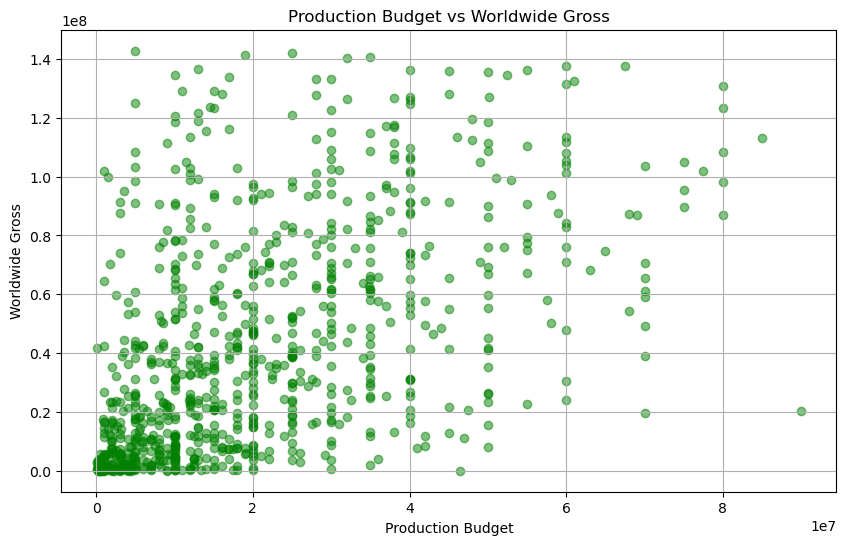

In [113]:
#I will extract the production budget and worldwide gross
production_budget = df_finance['production_budget']
worldwide_gross = df_finance['worldwide_gross']

#I will create a scatterplot to represent the data
plt.figure(figsize=(10, 6))
plt.scatter(production_budget, worldwide_gross, alpha=0.5, color='green')
plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()

##### Interpretation
The scatter plot shows a moderate positive correlation with the production budget and worldwide gross. This means that in general, movies with a higher production budget tend to have a higher worldwide gross.
There are some movies with high production budgets that tend to have low worldwide grosses and viseverca. However, the the overall trend is production budgets are more likely to be successful.

#### Top 20 Movies with their highest Production Budget and their Scaled Worldwide Gross 

Let's look at the top 20 Movies with the highest production budget and their gross worldwide

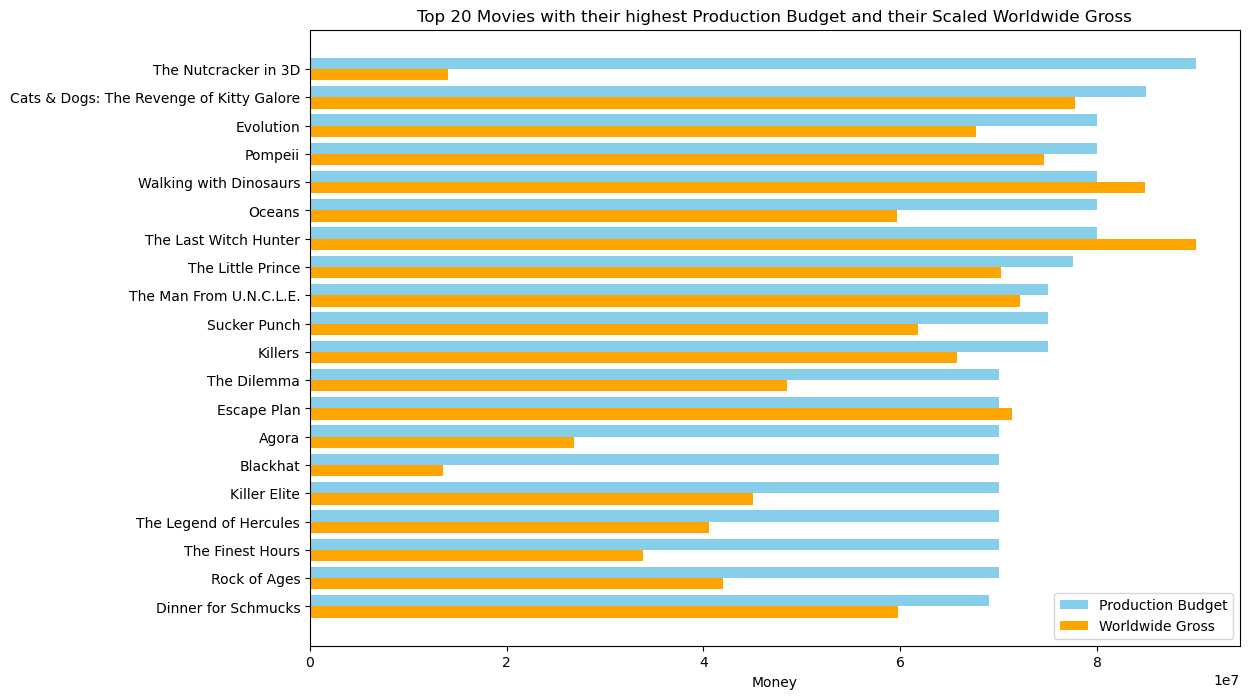

In [114]:
#I'll sort the data in a descending order
df_finance_sorted = df_finance.sort_values(by='production_budget', ascending=False)

#I'll select the top 20 highest values
top_20 = df_finance_sorted.head(20)

#I'll create a table
titles = top_20['title']
production = top_20['production_budget']
worldwide = top_20['worldwide_gross']

#I'll scale the worldwide gross to meet with the production budget
scaled_gross = worldwide / worldwide.max() * production_budget.max()

#Then create an array for the x-axis 
x = np.arange(len(titles))

#Create a width for the bars
bar = 0.4

#Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(x - bar/2, production, bar, label='Production Budget', color='skyblue')
plt.barh(x + bar/2, scaled_gross, bar, label='Worldwide Gross', color='orange')
plt.xlabel('Money')
plt.title('Top 20 Movies with their highest Production Budget and their Scaled Worldwide Gross')
plt.yticks(x, titles)
plt.legend(loc='lower right')
plt.gca().invert_yaxis()
plt.show()

##### Interpretation

From this bar chart we can see that the top 20 movies with a high production budget have all been successful. The majority of the movies have scaled worldwide grosses of over a billion dollars. This suggests that a high production budget is a good predictor of success.
Though the production budget according to the comparison reveals it is not as proportionate and therefore it is possible to make losses with a high production budget like for example Black Hat

#### Worldwide V Domestic Gross

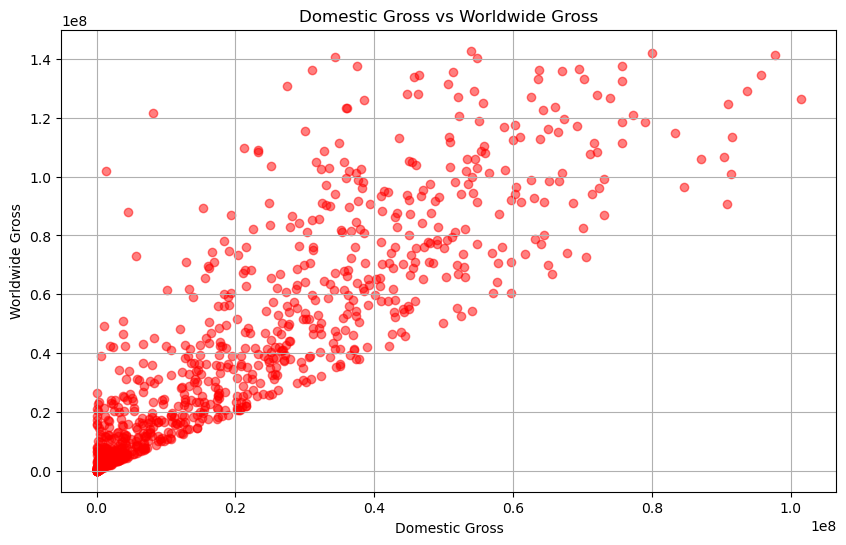

In [115]:
#I will extract the domestic and worldwide gross
domestic_gross = df_finance['domestic_gross']
worldwide_gross = df_finance['worldwide_gross']

#I will create a scatterplot to represent the data
plt.figure(figsize=(10, 6))
plt.scatter(domestic_gross, worldwide_gross, alpha=0.5, color='red')
plt.title('Domestic Gross vs Worldwide Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.show()

###### Interpretation

The scatter plot shows a strong positive correlation between worldwide and domestic gross. This means that normally movies with higher worldwide grosses aslso have higher domestic grosses.
There is still some variation but in most cases movies that are successful worldwide are also successful in their home country. 

##### Profit from the sales

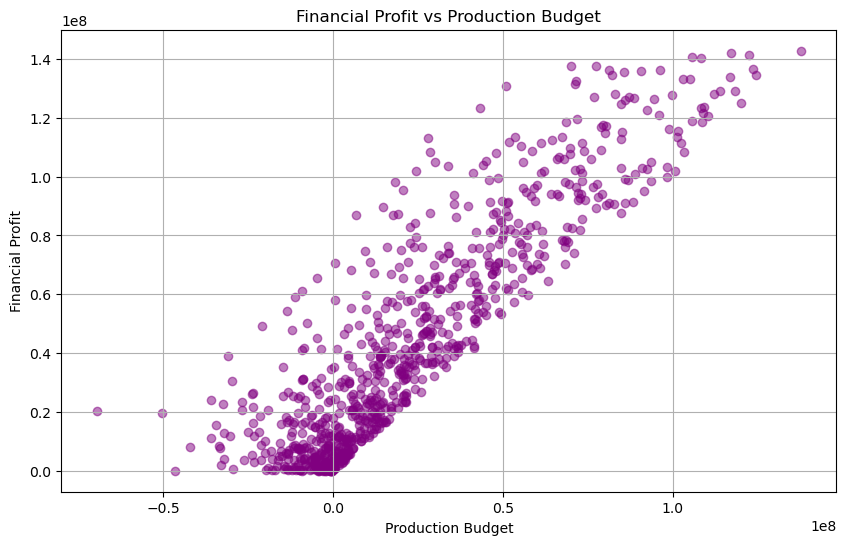

In [116]:
#I will extract the production budget and financial profits
production_budget = df_finance['production_budget']
financial_profit = df_finance_profit

#I will create a scatterplot to represent the data
plt.figure(figsize=(10, 6))
plt.scatter(financial_profit, worldwide_gross, alpha=0.5, color='purple')
plt.title('Financial Profit vs Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Financial Profit')
plt.grid(True)
plt.show()

###### Interpretation

There is a strong positive correlation between the financial profit and the production budget. Normally movies with a higher production budget tend to have higher profits.
It is important to note that there are other factors that can influence a movie's fiinancial success and a budget is one of them. In summary a large budget actually gives the movie an advantage when it comes to profits.

### Genre vs Popularity

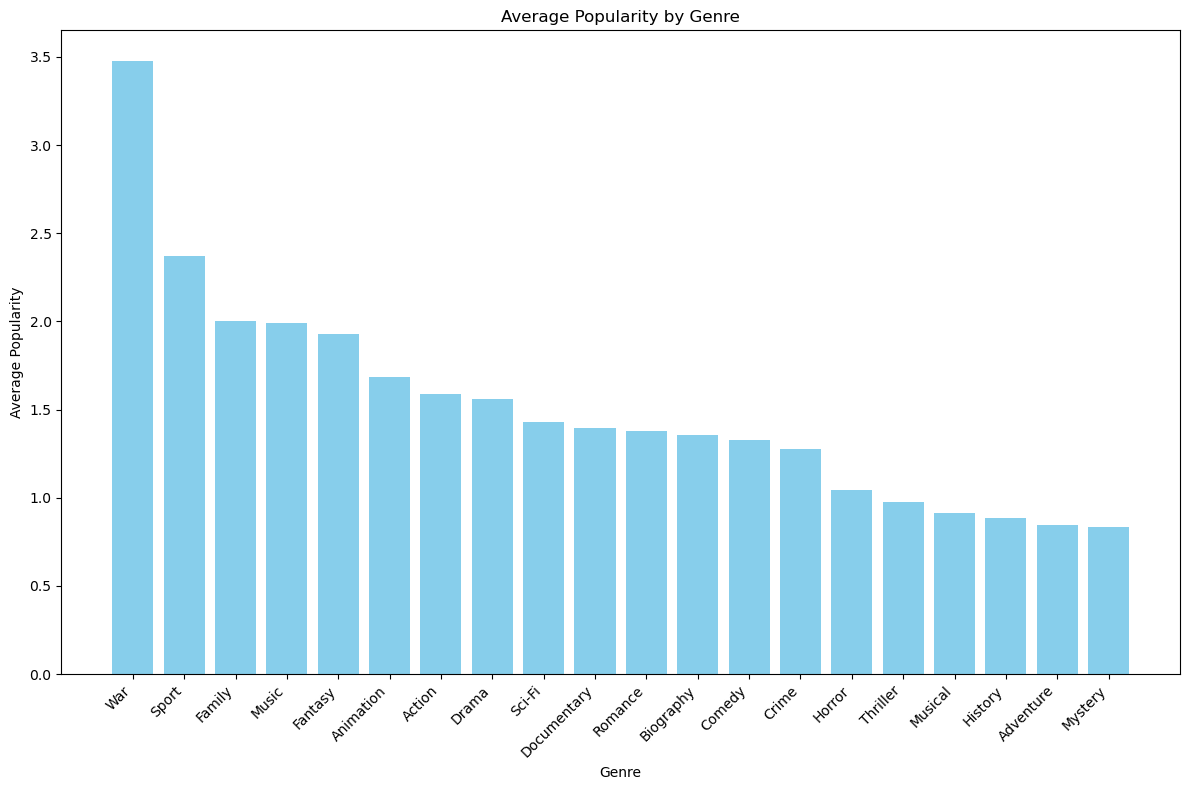

In [117]:
#I'll start by sorting the data frame by average popularity from highest to lowest
genre_popularity_df = genre_popularity_df.sort_values(by='Average Popularity', ascending=False)

#create a bar chart to visualize the average popularity by the genre
plt.figure(figsize=(12, 8))
plt.bar(genre_popularity_df['Genre'], genre_popularity_df['Average Popularity'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###### Interpretation

Movie genres that people are more inclined to be popular are movies that involve wars, sport, family, music and fantasy. Therefore to achieve a good rating in the film industry those are the 5 genres to focus on. The least popular are the mystery, adventure and history so therefore the downturn could be in focusing in those areas.

## Top 20 Directors

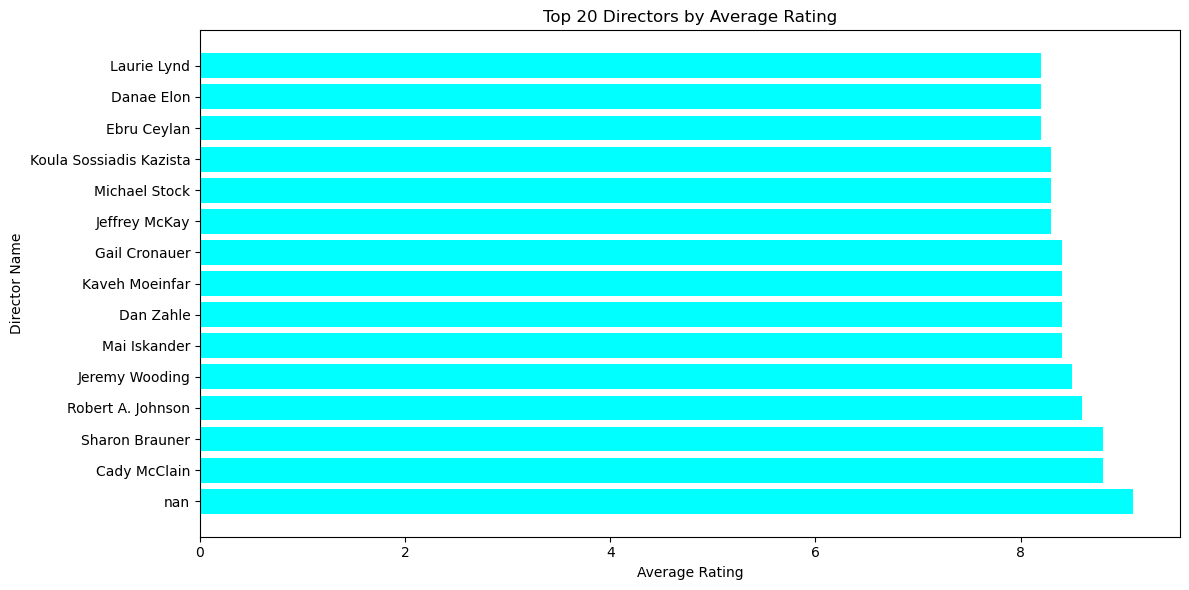

In [118]:
director_names = top_20_people['director_name'].astype(str)
average_ratings = top_20_people['averagerating']

plt.figure(figsize=(12, 6))
plt.barh( director_names, average_ratings, color='cyan')
plt.xlabel('Average Rating')
plt.ylabel('Director Name')
plt.title('Top 20 Directors by Average Rating')
plt.tight_layout()
plt.show()

### Top 20 Writers

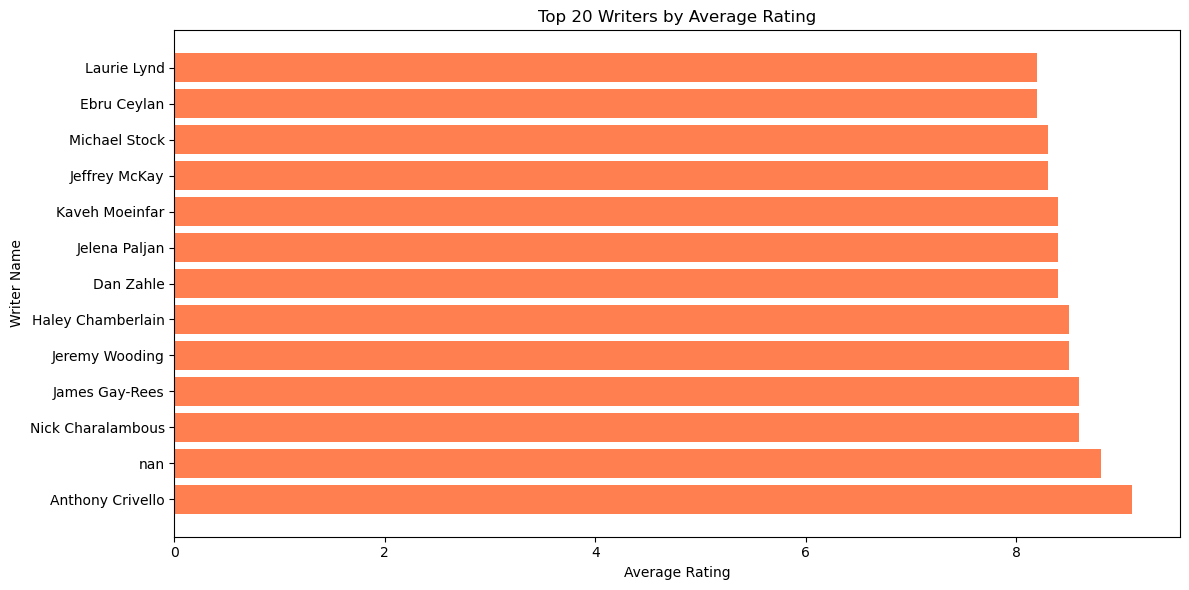

In [119]:
writer_names = top_20_people['writer_name'].astype(str)
average_ratings = top_20_people['averagerating']

plt.figure(figsize=(12, 6))
plt.barh( writer_names, average_ratings, color='coral')
plt.xlabel('Average Rating')
plt.ylabel('Writer Name')
plt.title('Top 20 Writers by Average Rating')
plt.tight_layout()
plt.show()

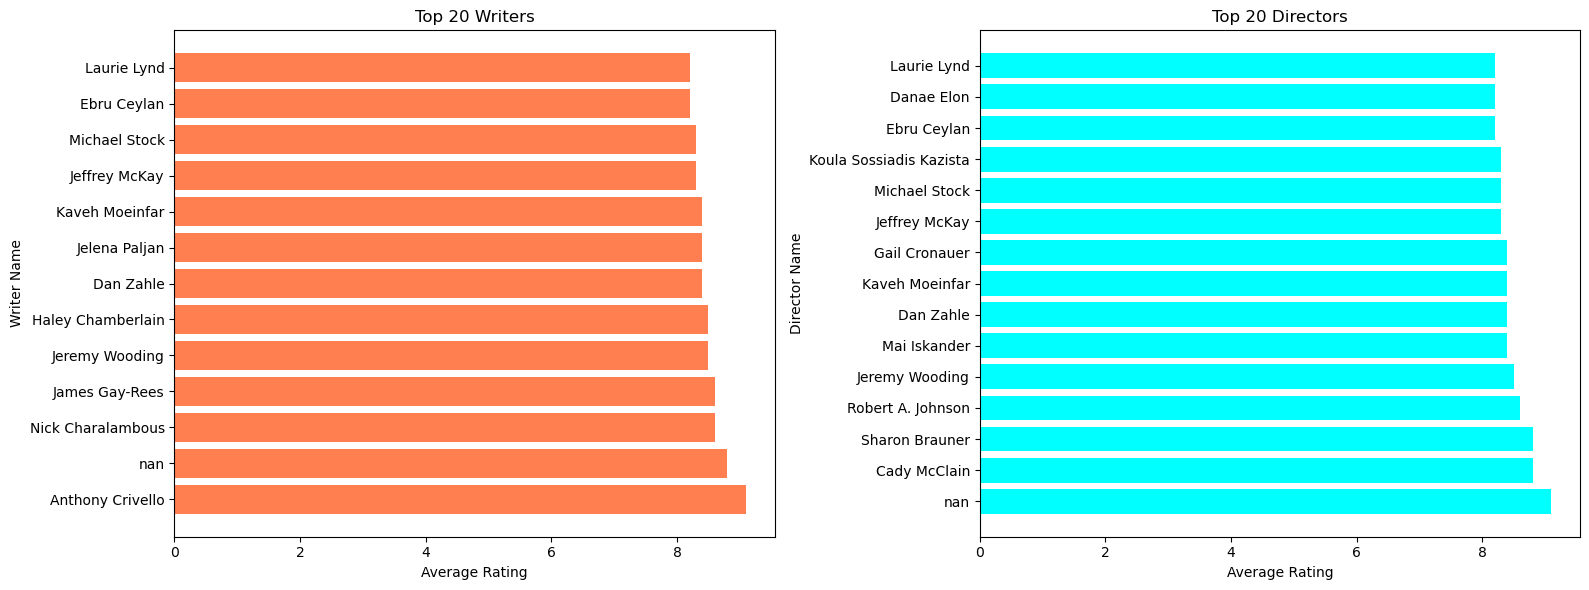

In [120]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#Plotting for writers
ax1.barh(writer_names, average_ratings, color='coral')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('Writer Name')
ax1.set_title('Top 20 Writers')

#Plotting for directors
ax2.barh(director_names, average_ratings, color='cyan')
ax2.set_xlabel('Average Rating')
ax2.set_ylabel('Director Name')
ax2.set_title('Top 20 Directors')

#Adjusting the layout
plt.tight_layout()
plt.show()

###### Interpretation

From the bar chart we can see that most writers actually directed the movies therefore people prefer movies based of books rather than their own creativity especially if the writer is involved in the creation of the movie. To make a movie successful high chances are the movie is based on a popular bookk and they are involved in the creation of the movie.